--- Training LogisticTorch ---
Epoch 100/1000, Loss: 0.4062
Epoch 200/1000, Loss: 0.3614
Epoch 300/1000, Loss: 0.3431
Epoch 400/1000, Loss: 0.3330
Epoch 500/1000, Loss: 0.3267
Epoch 600/1000, Loss: 0.3224
Epoch 700/1000, Loss: 0.3195
Epoch 800/1000, Loss: 0.3174
Epoch 900/1000, Loss: 0.3159
Epoch 1000/1000, Loss: 0.3148
----------------------------

--- Model Accuracy ---
LogisticTorch Accuracy: 0.8500
Scikit-learn Accuracy: 0.8500
----------------------



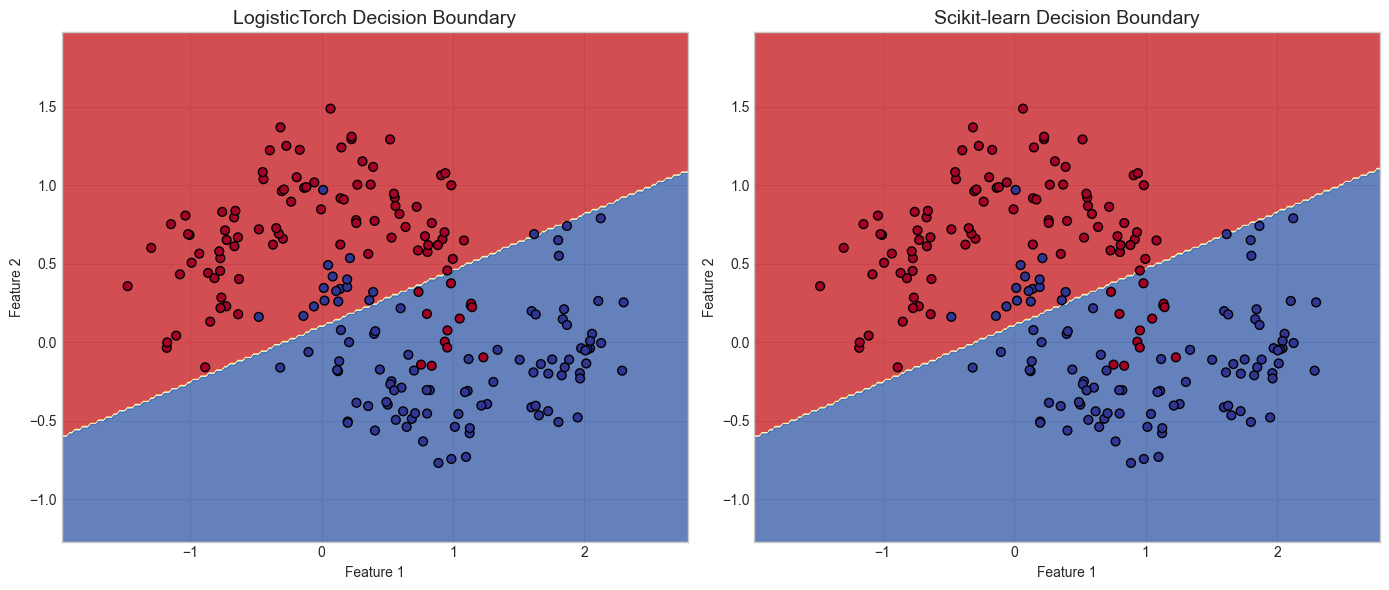

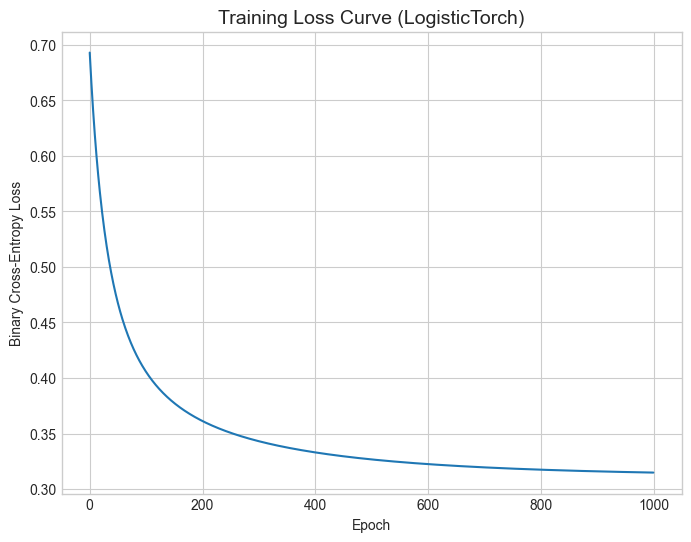

: 

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score

# Set a style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Logistic Regression Implementation in PyTorch
class LogisticTorch:
    """
    A from-scratch implementation of Logistic Regression using PyTorch.
    """
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.losses = []

    def _sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + torch.exp(-z))

    def fit(self, X, y):
        """
        Trains the logistic regression model.
        Args:
            X (np.ndarray): Training data of shape (n_samples, n_features).
            y (np.ndarray): Target values of shape (n_samples,).
        """
        n_samples, n_features = X.shape
        # Convert numpy arrays to PyTorch tensors
        X_tensor = torch.from_numpy(X.astype(np.float32))
        y_tensor = torch.from_numpy(y.astype(np.float32)).view(-1, 1)

        # Initialize parameters with requires_grad=True to track gradients
        self.weights = torch.zeros(n_features, 1, dtype=torch.float32, requires_grad=True)
        self.bias = torch.zeros(1, dtype=torch.float32, requires_grad=True)

        # --- Training Loop (Gradient Descent) ---
        print("--- Training LogisticTorch ---")
        for epoch in range(self.epochs):
            # 1. Forward pass: compute predicted y
            linear_model = torch.matmul(X_tensor, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # 2. Compute loss (Binary Cross-Entropy)
            epsilon = 1e-7  # Small value to prevent log(0)
            loss = -1/n_samples * torch.sum(
                y_tensor * torch.log(y_predicted + epsilon) +
                (1 - y_tensor) * torch.log(1 - y_predicted + epsilon)
            )
            self.losses.append(loss.item())

            # 3. Backward pass: compute gradients
            loss.backward()

            # 4. Update weights and bias (no_grad context)
            with torch.no_grad():
                self.weights -= self.lr * self.weights.grad
                self.bias -= self.lr * self.bias.grad

            # 5. Zero gradients for the next iteration
            self.weights.grad.zero_()
            self.bias.grad.zero_()

            # MODIFIED: Print progress every 100 epochs
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch+1}/{self.epochs}, Loss: {loss.item():.4f}')
        print("----------------------------\n")

    def predict_proba(self, X):
        """
        Returns the probability of the positive class.
        """
        X_tensor = torch.from_numpy(X.astype(np.float32))
        with torch.no_grad():
            linear_model = torch.matmul(X_tensor, self.weights) + self.bias
            y_predicted_proba = self._sigmoid(linear_model)
        return y_predicted_proba.numpy()

    def predict(self, X):
        """
        Predicts class labels (0 or 1).
        """
        probabilities = self.predict_proba(X)
        return (probabilities > 0.5).astype(int).flatten()

## 2. Data Generation and Model Training
# Generate the dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Train our LogisticTorch classifier
torch_model = LogisticTorch(lr=0.1, epochs=1000)
torch_model.fit(X, y)

# Train scikit-learn's LogisticRegression for comparison
sklearn_model = SklearnLogisticRegression()
sklearn_model.fit(X, y)

## 3. Performance Comparison and Reporting
# Get predictions
torch_preds = torch_model.predict(X)
sklearn_preds = sklearn_model.predict(X)

# Calculate and report accuracy
torch_accuracy = accuracy_score(y, torch_preds)
sklearn_accuracy = accuracy_score(y, sklearn_preds)

print("--- Model Accuracy ---")
print(f"LogisticTorch Accuracy: {torch_accuracy:.4f}")
print(f"Scikit-learn Accuracy: {sklearn_accuracy:.4f}")
print("----------------------\n")


## 4. Plotting Results
# Helper function for plotting decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', s=40)
    plt.title(title, fontsize=14)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# --- Plot 1: Decision Boundaries ---
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(torch_model, X, y, "LogisticTorch Decision Boundary")
plt.subplot(1, 2, 2)
plot_decision_boundary(sklearn_model, X, y, "Scikit-learn Decision Boundary")
plt.tight_layout()
plt.show()

# --- Plot 2: Loss Curve ---
plt.figure(figsize=(8, 6))
plt.plot(range(torch_model.epochs), torch_model.losses)
plt.title("Training Loss Curve (LogisticTorch)", fontsize=14)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.show()